In [1]:
import numpy as np
from models.linear import LinearRegression
from models.logistic import LogisticRegression
from metrics.classification_metrics import *

In [2]:
n_samples = 500
np.random.seed(42)

classes = ["A", "B", "C", "D"]

random_classes = np.random.choice(classes, size=n_samples)


class_to_int = {label: idx for idx, label in enumerate(classes)}
random_classes_int = np.vectorize(class_to_int.get)(random_classes)

In [3]:
X = np.random.normal(2, 2, n_samples)
Z = np.random.normal(9, 1, n_samples) 
P = np.random.beta(1, 2, n_samples)

Y = 2*X +  np.random.normal(0, 0.5, n_samples) + P + Z + random_classes_int * X 

X= np.column_stack((X,X**2, Z + X, X * P, P, random_classes_int))

In [4]:
reg = LinearRegression(regularization="None").fit(X,Y)
ridge = LinearRegression(regularization="Ridge").fit(X,Y)
lasso = LinearRegression(regularization="Lasso", n_iter = 10000, lr=0.001).fit(X,Y)
elastic = LinearRegression(regularization="ElasticNet", n_iter = 10000, lr=0.001, alpha=0.4).fit(X,Y)

In [5]:
elastic_pred = elastic.predict(X)
elastic.print_errors(Y, elastic_pred), lasso.print_errors(Y, lasso.predict(X)), ridge.print_errors(Y, ridge.predict(X))
elastic.score(X, Y), lasso.score(X, Y), ridge.score(X, Y)

╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  1.9092 │
├──────────┼─────────┤
│ RMSE     │  2.753  │
├──────────┼─────────┤
│ MSE      │  7.5791 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  1.7339 │
├──────────┼─────────┤
│ RMSE     │  2.4169 │
├──────────┼─────────┤
│ MSE      │  5.8413 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  1.721  │
├──────────┼─────────┤
│ RMSE     │  2.3877 │
├──────────┼─────────┤
│ MSE      │  5.7009 │
╘══════════╧═════════╛


(Array(0.87876916, dtype=float32),
 Array(0.90656686, dtype=float32),
 np.float64(0.9088114287261543))

In [6]:
#elastic.do_all(X, Y)

In [7]:
#reg.Cooks_distance(X,Y)

In [8]:
classes = ["A", "B"]
n_samples = 150

random_classes = np.random.choice(classes, size=n_samples)


class_to_int = {label: idx for idx, label in enumerate(classes)}
random_classes_int = np.vectorize(class_to_int.get)(random_classes)

X = np.random.normal(2, 2, n_samples)
Z = np.random.normal(9, 1, n_samples) 
P = np.random.beta(1, 2, n_samples)


X= np.column_stack((Z, X, X**2))

Y = random_classes_int

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
import pandas as pd

#X = pd.DataFrame(X, columns=["1","2","3","4","5"])

In [10]:

log = LogisticRegression(X.shape[1], 
                         len(classes), 
                         regularization="elastic_net", 
                         solver="LBFGS",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=1, 
                         n_iter = 100,
                         random_state = 0)
log.fit(X, Y)

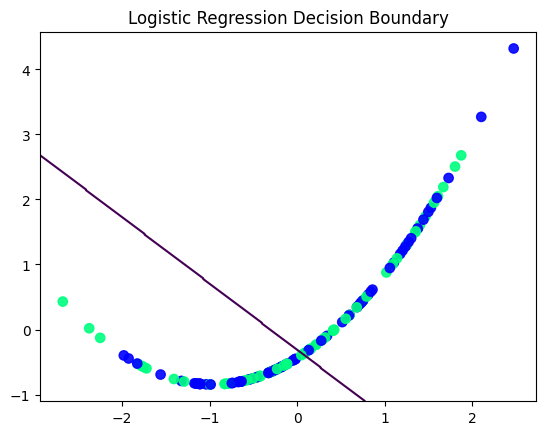

In [11]:
pred = log.predict(X)
pred
balanced_accuracy(Y, pred)
log.plot(1,2)

In [12]:
log.theta

array([-0.21734725, -0.57503186, -0.94251201,  0.94251201,  0.88465195,
       -0.26086402,  0.24908968, -0.87287762])

In [13]:
from models.onevsall import OVA
from models.svm import SVMClassificator
for i in range(0, 18):
    ova = OVA(SVMClassificator(kernel="poly", n_iter=i, lr=0.01 , C=i, r=1, degree=2 )).fit(X,Y)

    print(balanced_accuracy(Y, ova.predict(X)), i)

0.5 0
0.5258928571428572 1
0.5964285714285714 2
0.4946428571428571 3
0.5169642857142858 4
0.4946428571428571 5
0.5169642857142858 6
0.4946428571428571 7
0.5169642857142858 8
0.4946428571428571 9
0.5169642857142858 10
0.4946428571428571 11
0.5169642857142858 12
0.4946428571428571 13
0.5169642857142858 14
0.4946428571428571 15
0.5169642857142858 16
0.4946428571428571 17


Converged at iteration 1
0.6196428571428572


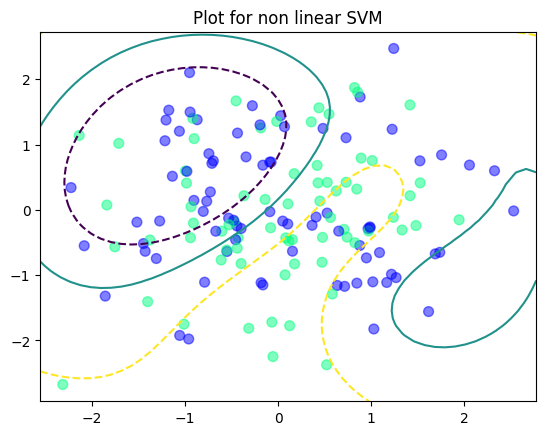

In [14]:
svm = SVMClassificator(kernel="rbf", n_iter=1000, lr=0.0000001 , C=1, r=1, gamma=0.4).fit(X,Y)
svm.predict(X)
print(balanced_accuracy(Y, svm.predict(X)))
svm.plot(0,1)

In [15]:
from models. decision_trees import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X, Y)

print(balanced_accuracy(Y, tree.predict(X)))
print(confusion_matrix(Y, tree.predict(X)))

0.7964285714285715
[[68. 12.]
 [18. 52.]]


In [23]:
from models.decision_trees import DecisionTreeRegressor
from metrics.regression_metrics import *

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, Y)


print(MSE(Y, tree.predict(X)))
print(MAE(Y, tree.predict(X)))
print(RMSE(Y, tree.predict(X)))


0.13814631506704675
0.2762926301340935
0.3716803937081518
